In [5]:
##to upload a csv file from mydrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
##import pandas and numpy
import pandas as pd
import numpy as np

In [7]:
##upload a CSv file
dataset_1=pd.read_csv('/content/drive/MyDrive/store.csv')#load first dataset in CSV format
dataset_1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
##upload a CSv file
dataset_1_train_data=pd.read_csv('/content/drive/MyDrive/train.csv')#load first dataset in CSV format
dataset_1_train_data.head()

<ipython-input-8-f61cc909b053>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_1_train_data=pd.read_csv('/content/drive/MyDrive/train.csv')#load first dataset in CSV format


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
##check the shape of dataset_1_train_data
dataset_1_train_data.shape

(1017209, 9)

In [10]:
merged_train_and_store_data = pd.merge(dataset_1, dataset_1_train_data, how='inner', on='Store')

In [11]:
##check the shape of data
merged_train_and_store_data.shape

(1017209, 18)

In [12]:
#now will check the data info
merged_train_and_store_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   



> ### Handling missing value and filling the missing data in the data sheet



In [13]:
##check missing values in the data set
merged_train_and_store_data.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,2642
CompetitionOpenSinceMonth,323348
CompetitionOpenSinceYear,323348
Promo2,0
Promo2SinceWeek,508031
Promo2SinceYear,508031
PromoInterval,508031


In [14]:
##check the unique values in CompetitionOpenSinceMonth
merged_train_and_store_data['CompetitionOpenSinceMonth'].unique()


array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [15]:
merged_train_and_store_data['CompetitionOpenSinceYear'] = merged_train_and_store_data.groupby('StoreType')['CompetitionOpenSinceYear'].transform(lambda x: x.fillna(x.median()))
merged_train_and_store_data['CompetitionOpenSinceMonth'] = merged_train_and_store_data.groupby('StoreType')['CompetitionOpenSinceMonth'].transform(lambda x: x.fillna(x.median()))


In [16]:
#now will check the data of CompetitionOpenSinceMonth
merged_train_and_store_data['CompetitionOpenSinceMonth'].unique()


array([ 9., 11., 12.,  4., 10.,  8.,  3.,  6.,  5.,  1.,  2.,  7.])

In [17]:
#now will check the data of CompetitionOpenSinceYear
merged_train_and_store_data['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
       2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961., 1995.,
       2001., 1990., 1994., 1900., 1998.])

In [18]:
##now conver the CompetitionOpenSinceMonth into int format
merged_train_and_store_data['CompetitionOpenSinceMonth']=merged_train_and_store_data['CompetitionOpenSinceMonth'].astype(int)
merged_train_and_store_data['CompetitionOpenSinceYear']=merged_train_and_store_data['CompetitionOpenSinceYear'].astype(int)

NOw will fill the missing values under Promo2SinceWeek, Promo2SinceYear and PromoInterval

Description:
Promo2Since[Year/Week] - describes the year and calendar week when the store
started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the
months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round
starts in February, May, August, November of any given year for that store

In [19]:
##check the unique values under Promo2SinceWeek
merged_train_and_store_data['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [20]:
## check the unique values in Promo2SinceYear
merged_train_and_store_data['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [21]:
merged_train_and_store_data['Promo2SinceYear'] = merged_train_and_store_data.groupby('StoreType')['Promo2SinceYear'].transform(lambda x: x.fillna(x.median()))
merged_train_and_store_data['Promo2SinceWeek'] = merged_train_and_store_data.groupby('StoreType')['Promo2SinceWeek'].transform(lambda x: x.fillna(x.median()))


In [22]:
##check missing values under PromoInterval
merged_train_and_store_data['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [23]:
#now will conver this into intiger form
month_groups = {
    'Jan,Apr,Jul,Oct': 1,
    'Feb,May,Aug,Nov': 2,
    'Mar,Jun,Sept,Dec': 3
}

merged_train_and_store_data['MonthGroup'] = merged_train_and_store_data['PromoInterval'].map(month_groups)


In [24]:
##check missing values under PromoInterval
merged_train_and_store_data['MonthGroup'].unique()

array([nan,  1.,  2.,  3.])

In [25]:
##check the value count in MonthGroup
merged_train_and_store_data['MonthGroup'].value_counts()

,count
MonthGroup,
1.0,293122
2.0,118596
3.0,97460


In [26]:
##check the median of MonthGroup
merged_train_and_store_data['MonthGroup'].median()

1.0

In [27]:
## fill the missing values by medien
merged_train_and_store_data['MonthGroup'] = merged_train_and_store_data['MonthGroup'].fillna(merged_train_and_store_data['MonthGroup'].median())

In [28]:
##check the null value in dataset
merged_train_and_store_data.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,2642
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,508031


In [29]:
#shape of data
merged_train_and_store_data.shape

(1017209, 19)

In [30]:
##We will chnag the name of colmn of MonthGroup to MonthGroup_PromoInterval
merged_train_and_store_data.rename(columns={'MonthGroup': 'MonthGroup_PromoInterval'}, inplace=True)

In [31]:
##Now will drop the column PromoInterval as we have coverted it as MonthGroup_PromoInterval
merged_train_and_store_data.drop('PromoInterval', axis=1, inplace=True)

In [32]:
##now agian check the info of data
merged_train_and_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  int64  
 5   CompetitionOpenSinceYear   1017209 non-null  int64  
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            1017209 non-null  float64
 8   Promo2SinceYear            1017209 non-null  float64
 9   DayOfWeek                  1017209 non-null  int64  
 10  Date                       1017209 non-null  object 
 11  Sales                      1017209 non-null  int64  
 12  Customers                  1017209 non-null  int64  
 13  Open        

In [33]:
##now convert these columns Promo2SinceWeek,  Promo2SinceYear, MonthGroup_PromoInterval  into int
merged_train_and_store_data['Promo2SinceWeek']=merged_train_and_store_data['Promo2SinceWeek'].astype(int)
merged_train_and_store_data['Promo2SinceYear']=merged_train_and_store_data['Promo2SinceYear'].astype(int)
merged_train_and_store_data['MonthGroup_PromoInterval']=merged_train_and_store_data['MonthGroup_PromoInterval'].astype(int)

In [34]:
##Now again check the info
merged_train_and_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  int64  
 5   CompetitionOpenSinceYear   1017209 non-null  int64  
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            1017209 non-null  int64  
 8   Promo2SinceYear            1017209 non-null  int64  
 9   DayOfWeek                  1017209 non-null  int64  
 10  Date                       1017209 non-null  object 
 11  Sales                      1017209 non-null  int64  
 12  Customers                  1017209 non-null  int64  
 13  Open        

In [35]:
##now check unique values of CompetitionDistance
merged_train_and_store_data['CompetitionDistance'].unique()

array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
       2.200e+03, 1.650e+03, 3.300e+02, 2.244e+04, 1.996e+04, 3.510e+03,
       3.320e+03, 7.910e+03, 2.370e+03, 2.239e+04, 2.710e+03, 1.181e+04,
       1.870e+03, 4.800e+02, 5.600e+02, 1.069e+04, 

In [36]:
##Now fill the missing values in CompetitionDistance by mean
merged_train_and_store_data['CompetitionDistance'] = merged_train_and_store_data['CompetitionDistance'].fillna(merged_train_and_store_data['CompetitionDistance'].mean())

In [37]:
##check the unique value in store type
merged_train_and_store_data['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [38]:
##conver the object in to int
merged_train_and_store_data['StoreType'] = merged_train_and_store_data['StoreType'].map({'a': 1, 'b': 2, 'c': 3, 'd': 4})

In [39]:
##check the unique values in Assortment
merged_train_and_store_data['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [40]:
##conver the object in to int
merged_train_and_store_data['Assortment'] = merged_train_and_store_data['Assortment'].map({'a': 1, 'b': 2, 'c': 3})

In [41]:
##now check the data describe
merged_train_and_store_data.describe()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,MonthGroup_PromoInterval
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,2.207467e+00,1.935141e+00,5.430086e+03,7.418199e+00,2.009055e+03,5.005638e-01,2.200699e+01,2.011820e+03,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,1.308212e+00
std,3.219087e+02,1.365376e+00,9.938011e-01,7.705298e+03,2.678862e+00,4.983904e+00,4.999999e-01,1.026121e+01,1.208650e+00,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,6.362705e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.800000e+02,1.000000e+00,1.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,1.400000e+01,2.011000e+03,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,5.580000e+02,1.000000e+00,1.000000e+00,2.330000e+03,8.000000e+00,2.010000e+03,1.000000e+00,2.200000e+01,2.012000e+03,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,8.380000e+02,4.000000e+00,3.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,1.115000e+03,4.000000e+00,3.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00


As per the above sheet, we can see the most outliers and skewed data in column CompetitionDistance

In [42]:
##check the data info
merged_train_and_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  int64  
 2   Assortment                 1017209 non-null  int64  
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  int64  
 5   CompetitionOpenSinceYear   1017209 non-null  int64  
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            1017209 non-null  int64  
 8   Promo2SinceYear            1017209 non-null  int64  
 9   DayOfWeek                  1017209 non-null  int64  
 10  Date                       1017209 non-null  object 
 11  Sales                      1017209 non-null  int64  
 12  Customers                  1017209 non-null  int64  
 13  Open        

<Axes: ylabel='CompetitionDistance'>

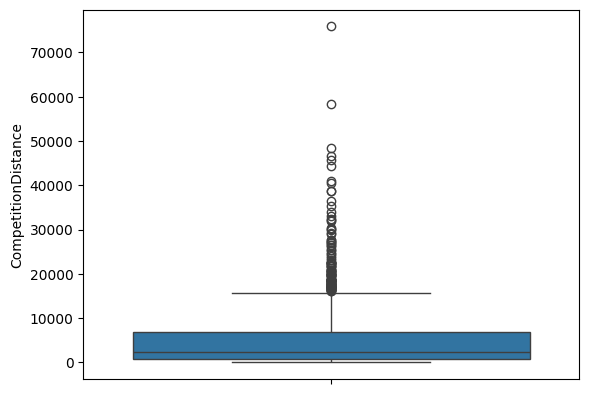

In [43]:
##check outliers in CompetitionDistance
import seaborn as sns
sns.boxplot(dataset_1['CompetitionDistance'])

In [44]:
##remove outliers
from scipy import stats
merged_train_and_store_data['CompetitionDistance']=np.log(merged_train_and_store_data['CompetitionDistance'])

<Axes: ylabel='CompetitionDistance'>

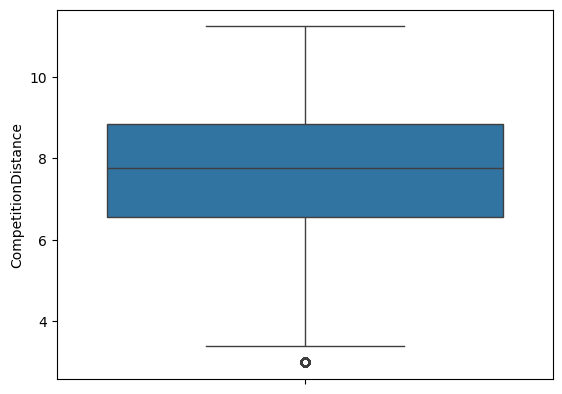

In [45]:
##check outliers in CompetitionDistance
import seaborn as sns
sns.boxplot(merged_train_and_store_data['CompetitionDistance'])

In [46]:
#now again check the data
merged_train_and_store_data.describe()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,MonthGroup_PromoInterval
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,2.207467e+00,1.935141e+00,7.644638e+00,7.418199e+00,2.009055e+03,5.005638e-01,2.200699e+01,2.011820e+03,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,1.308212e+00
std,3.219087e+02,1.365376e+00,9.938011e-01,1.559957e+00,2.678862e+00,4.983904e+00,4.999999e-01,1.026121e+01,1.208650e+00,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,6.362705e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,2.995732e+00,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.800000e+02,1.000000e+00,1.000000e+00,6.565265e+00,6.000000e+00,2.008000e+03,0.000000e+00,1.400000e+01,2.011000e+03,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,5.580000e+02,1.000000e+00,1.000000e+00,7.753624e+00,8.000000e+00,2.010000e+03,1.000000e+00,2.200000e+01,2.012000e+03,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,8.380000e+02,4.000000e+00,3.000000e+00,8.836374e+00,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,1.115000e+03,4.000000e+00,3.000000e+00,1.123664e+01,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00


In [47]:
##check the shape of data
merged_train_and_store_data.shape

(1017209, 18)

 Uploading the test data

In [69]:
##upload a CSv file
#dataset_1_test_data=pd.read_csv('/content/drive/MyDrive/test.csv')#load first dataset in CSV format
#dataset_1_test_data.head()

In [49]:
##checkthe datainfor
#dataset_1_test_data.info()

In [50]:
#merged_TESt_and_store_data = pd.merge(dataset_1, dataset_1_test_data, how='inner', on='Store')

In [51]:
#now check the shape of data
#merged_TESt_and_store_data.shape

In [52]:
##check missing values
#merged_TESt_and_store_data.isnull().sum()

In [53]:
##

##uploading  the test data


In [54]:
##upload a CSv file
dataset_3_test=pd.read_csv('/content/drive/MyDrive/test.csv')#load first dataset in CSV format
dataset_3_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


# **EDA** **part**

EDA to Check for distribution in both training and test sets - are the promotions
distributed similarly between these two groups?

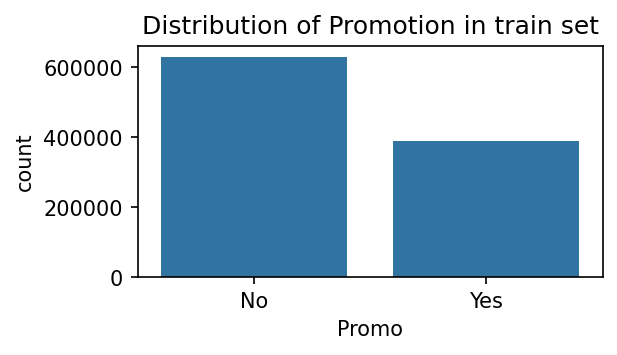

In [55]:
##check the plot promo in train data
plt.figure(figsize=(4,2), dpi = 150)
sns.countplot(merged_train_and_store_data, x = 'Promo')
plt.title('Distribution of Promotion in train set')
plt.xticks([0,1], ['No','Yes'])
plt.show()


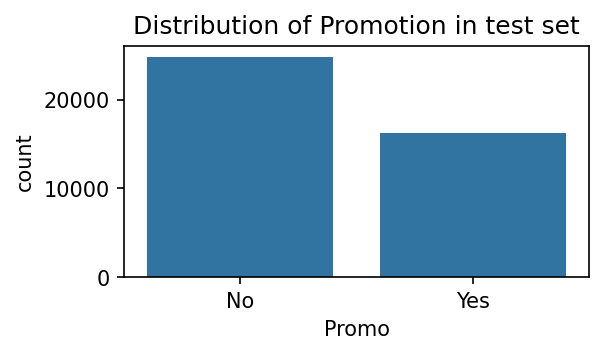

In [56]:
##check the plot promo in test data
plt.figure(figsize=(4,2), dpi = 150)
sns.countplot(dataset_3_test, x = 'Promo')
plt.title('Distribution of Promotion in test set')
plt.xticks([0,1], ['No','Yes'])
plt.show()

<Axes: xlabel='Promo', ylabel='Sales'>

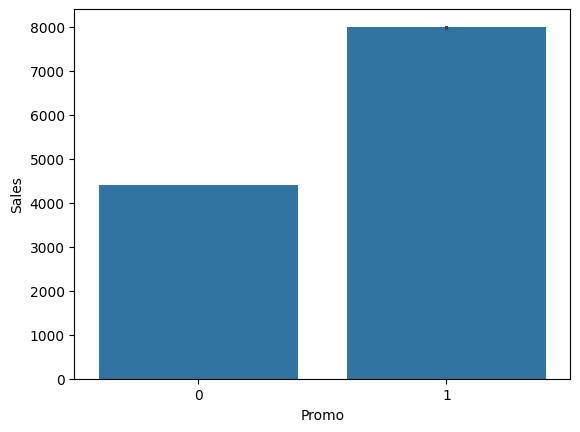

In [57]:
##check promo distrubution vs sales
sns.barplot(x='Promo',y='Sales',data=merged_train_and_store_data)

<Axes: xlabel='Customers', ylabel='Sales'>

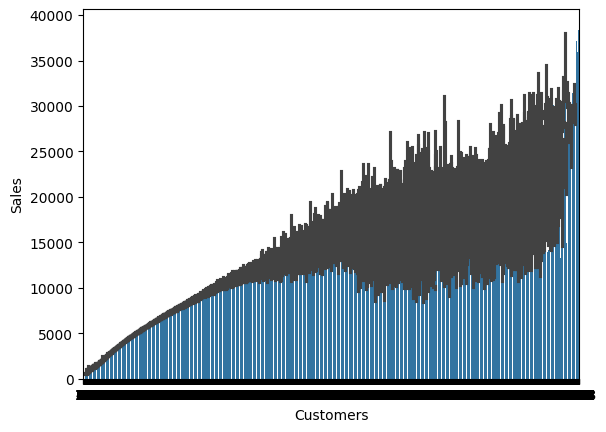

In [58]:
##check the plot Customers	and sales
sns.barplot(x='Customers',y='Sales',data=merged_train_and_store_data)

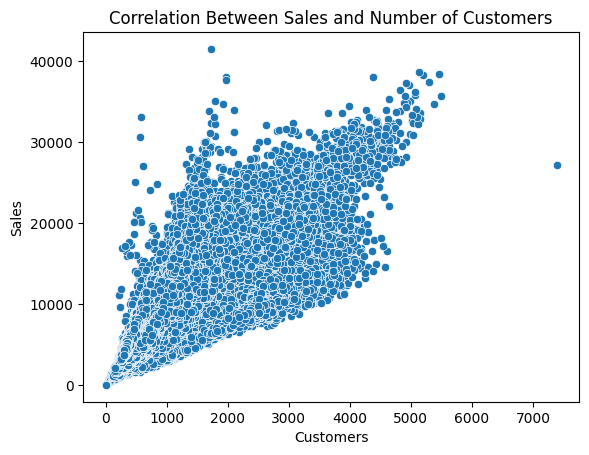

In [59]:
import matplotlib.pyplot as plt
sns.scatterplot(x='Customers', y='Sales', data=merged_train_and_store_data)
plt.title('Correlation Between Sales and Number of Customers')
plt.show()

Observations:

Positive Correlation: The graph suggests a positive correlation between the number of customers and sales.

Linearity: The scatter plot seems to suggest a linear relationship, though it might be worth calculating the correlation coefficient to confirm this. If the relationship is linear, a simple linear regression could be a good model to predict sales based on the number of customers.

<Axes: xlabel='Open', ylabel='Sales'>

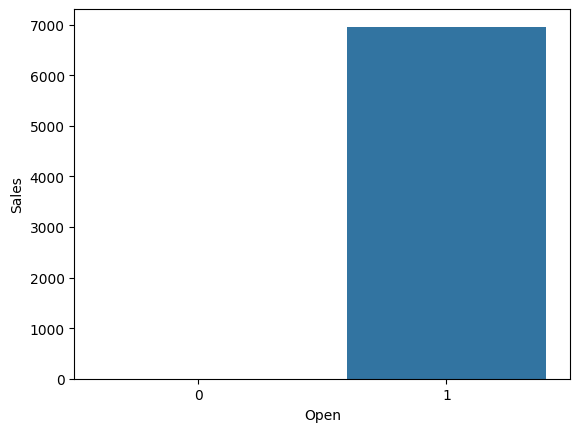

In [60]:
##sales when open
sns.barplot(x='Open',y='Sales',data=merged_train_and_store_data)

Check & compare sales behavior before, during and after holidays

<Axes: >

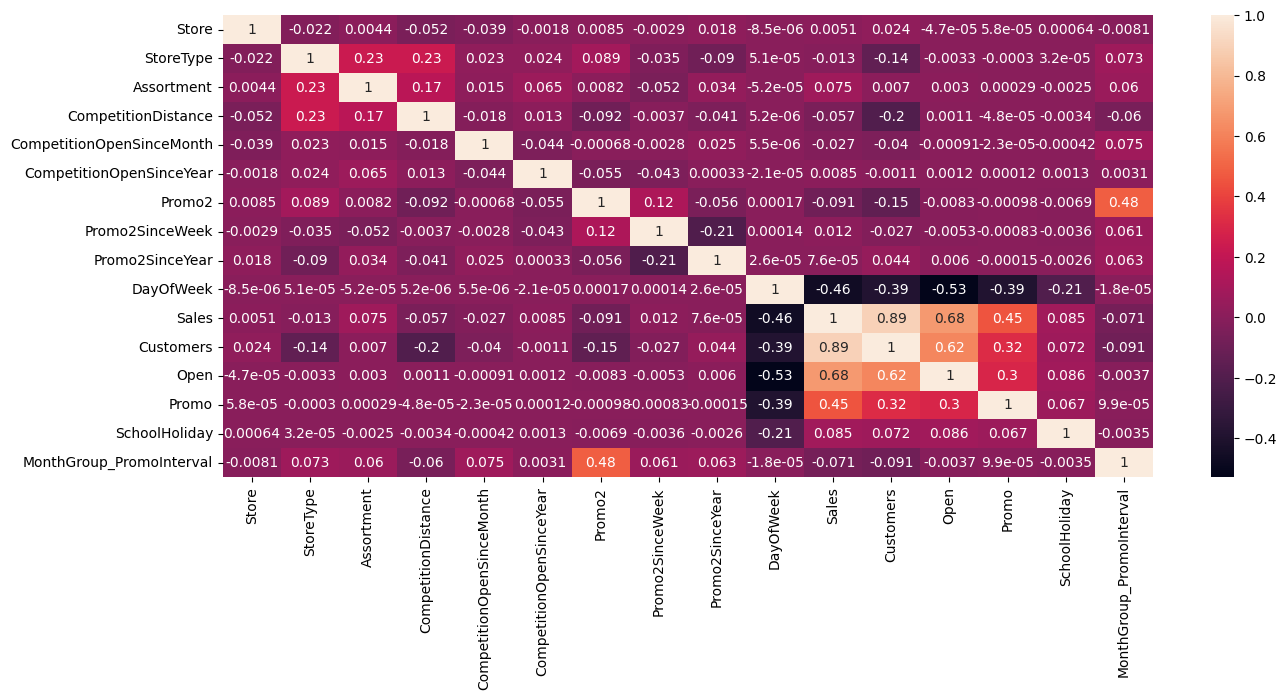

In [61]:
plt.figure(figsize=(15,6))
sns.heatmap(merged_train_and_store_data.corr(numeric_only=True), annot=True)

Sales and Customers: There's a strong positive correlation between the number of customers and sales. This means that as the number of customers increases, sales also tend to increase.

Promo and Sales: Promotions have a positive correlation with sales, indicating that promotional activities help boost sales.

DayOfWeek and Sales: The day of the week shows a moderate correlation with sales, suggesting that sales vary on different days of the week.

Now will check



*   Check & compare sales behavior before, during and after holidays
*    Find out any seasonal (Christmas, Easter etc) purchase behaviours,



In [62]:
##check unique values in StateHoliday
merged_train_and_store_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are
closed on state holidays. Note that all schools are closed on public holidays and
weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

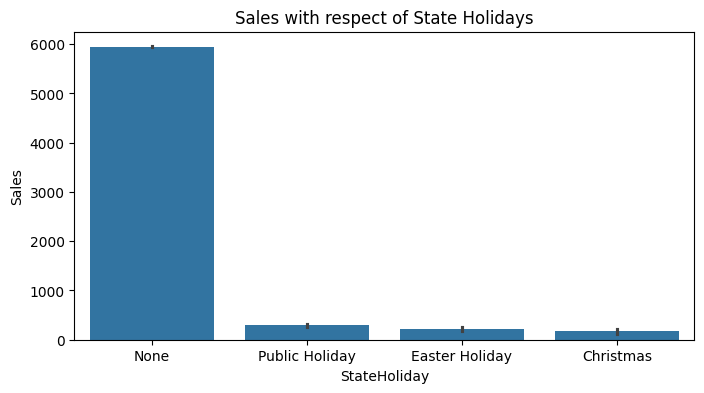

In [63]:
plt.figure(figsize=(8,4))
sns.barplot(merged_train_and_store_data, x='StateHoliday', y='Sales')
plt.title('Sales with respect of State Holidays')
plt.xticks([0,1,2,3],['None','Public Holiday','Easter Holiday','Christmas'])
plt.show()

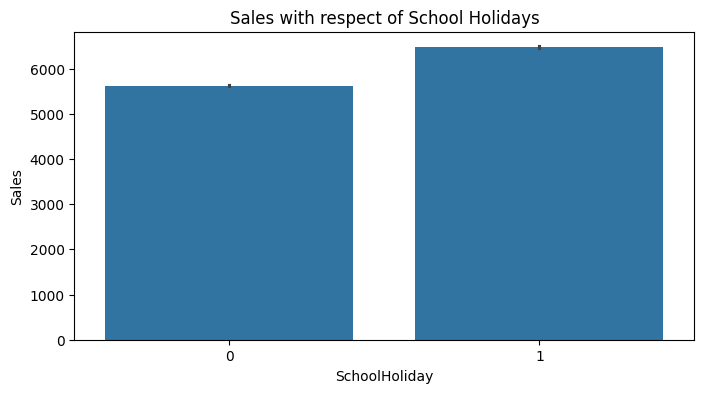

In [64]:
plt.figure(figsize=(8,4))
sns.barplot(merged_train_and_store_data, x='SchoolHoliday', y='Sales')
plt.title('Sales with respect of School Holidays')
plt.show()

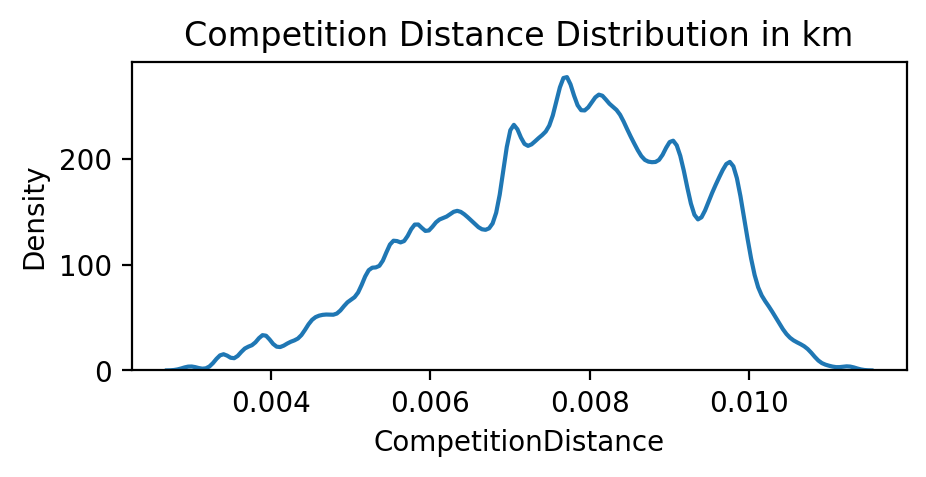

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,2), dpi=200)
sns.kdeplot(merged_train_and_store_data['CompetitionDistance']/1000)
plt.title('Competition Distance Distribution in km')
plt.show()

**Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?**

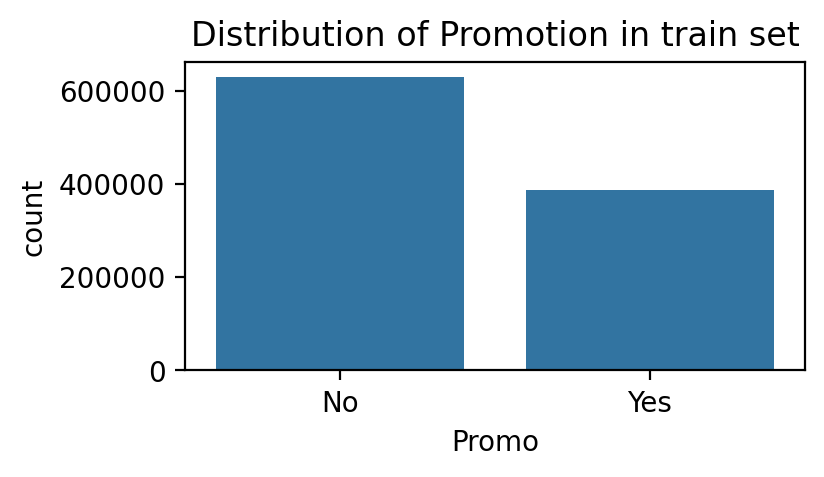

In [72]:
plt.figure(figsize=(4,2), dpi = 200)
sns.countplot(merged_train_and_store_data, x = 'Promo')
plt.title('Distribution of Promotion in train set')
plt.xticks([0,1], ['No','Yes'])
plt.show()

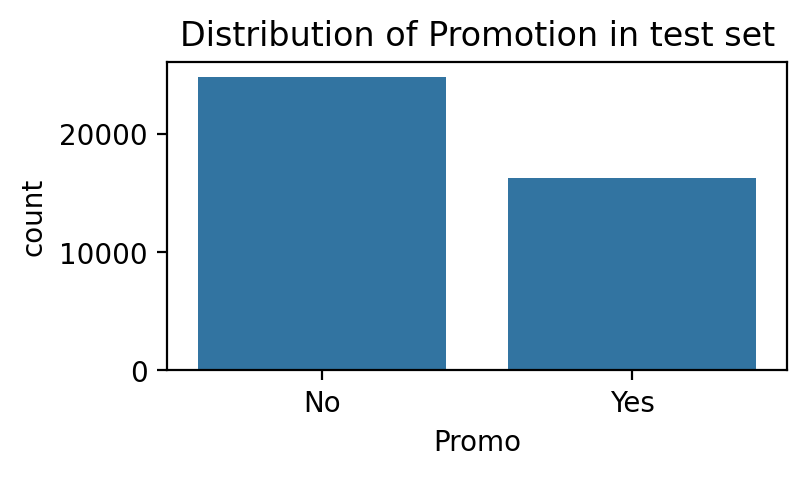

In [73]:
plt.figure(figsize=(4,2), dpi = 200)
sns.countplot(dataset_3_test, x = 'Promo')
plt.title('Distribution of Promotion in test set')
plt.xticks([0,1], ['No','Yes'])
plt.show()

#####Promotion in training and testing set is NOT similarly distributed

**checking  and coverting Date column data into time series data**


In [75]:
##check the data in date column
merged_train_and_store_data['Date']

,Date
0,2015-07-31
1,2015-07-30
2,2015-07-29
3,2015-07-28
4,2015-07-27
...,...
1017204,2013-01-05
1017205,2013-01-04
1017206,2013-01-03
1017207,2013-01-02


In [74]:
merged_train_and_store_data["Date"]=pd.to_datetime(merged_train_and_store_data["Date"])
merged_train_and_store_data["Day"]=merged_train_and_store_data["Date"].dt.day
merged_train_and_store_data["Week"]=merged_train_and_store_data["Date"].dt.isocalendar().week
merged_train_and_store_data["Month"]=merged_train_and_store_data["Date"].dt.month
merged_train_and_store_data["Year"]=merged_train_and_store_data["Date"].dt.year

In [77]:
dataset_3_test["Date"]=pd.to_datetime(dataset_3_test["Date"])
dataset_3_test["Day"]=dataset_3_test["Date"].dt.day
dataset_3_test["Week"]=dataset_3_test["Date"].dt.isocalendar().week
dataset_3_test["Month"]=dataset_3_test["Date"].dt.month
dataset_3_test["Year"]=dataset_3_test["Date"].dt.year

In [78]:
print("Train")
train_min = merged_train_and_store_data['Date'].min()
print(f"min {train_min}")

train_max = merged_train_and_store_data['Date'].max()
print(f"max {train_max}")

print(f"delta: {train_max - train_min}")

print("\nTest")

test_min = dataset_3_test['Date'].min()
print(f"min {test_min}")

test_max = dataset_3_test['Date'].max()
print(f"max {test_max}")

print(f"delta: {test_max - test_min}")

Train
min 2013-01-01 00:00:00
max 2015-07-31 00:00:00
delta: 941 days 00:00:00

Test
min 2015-08-01 00:00:00
max 2015-09-17 00:00:00
delta: 47 days 00:00:00


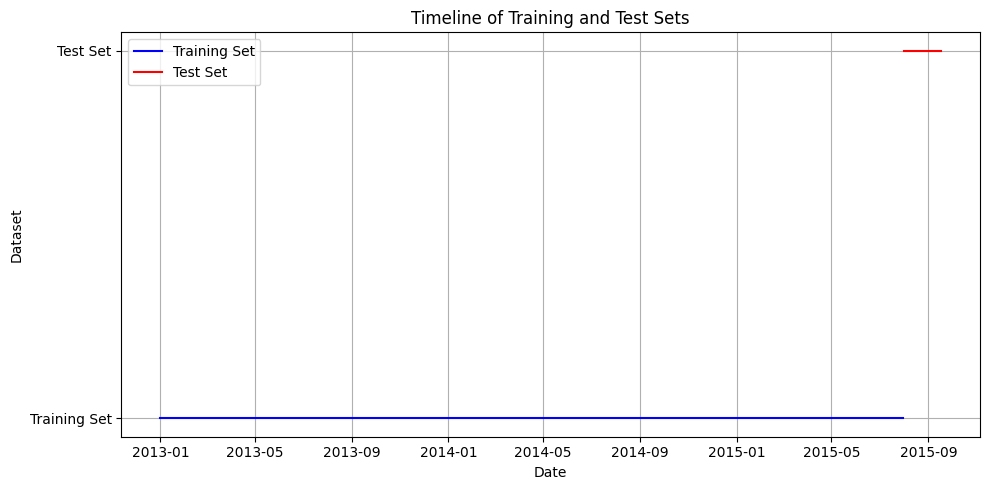

In [79]:
# Define the start and end dates for the training and test sets
train_start_date = train_min
train_end_date = train_max

test_start_date = test_min
test_end_date = test_max

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the training set duration
plt.plot([train_start_date, train_end_date], [1, 1], label='Training Set', color='blue')

# Plot the test set duration
plt.plot([test_start_date, test_end_date], [2, 2], label='Test Set', color='red')

# Set plot title and labels
plt.title('Timeline of Training and Test Sets')
plt.xlabel('Date')
plt.ylabel('Dataset')
plt.yticks([1, 2], ['Training Set', 'Test Set'])

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
merged_train_and_store_data.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
DayOfWeek,0


In [81]:
##check data descp
merged_train_and_store_data.describe()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,...,Sales,Customers,Open,Promo,SchoolHoliday,MonthGroup_PromoInterval,Day,Week,Month,Year
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,...,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209.0,1.017209e+06,1.017209e+06
mean,5.584297e+02,2.207467e+00,1.935141e+00,7.644638e+00,7.418199e+00,2.009055e+03,5.005638e-01,2.200699e+01,2.011820e+03,3.998341e+00,...,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,1.308212e+00,1.570279e+01,23.615515,5.846762e+00,2.013832e+03
min,1.000000e+00,1.000000e+00,1.000000e+00,2.995732e+00,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,2.013000e+03
25%,2.800000e+02,1.000000e+00,1.000000e+00,6.565265e+00,6.000000e+00,2.008000e+03,0.000000e+00,1.400000e+01,2.011000e+03,2.000000e+00,...,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.000000e+00,11.0,3.000000e+00,2.013000e+03
50%,5.580000e+02,1.000000e+00,1.000000e+00,7.753624e+00,8.000000e+00,2.010000e+03,1.000000e+00,2.200000e+01,2.012000e+03,4.000000e+00,...,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.600000e+01,22.0,6.000000e+00,2.014000e+03
75%,8.380000e+02,4.000000e+00,3.000000e+00,8.836374e+00,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03,6.000000e+00,...,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.300000e+01,35.0,8.000000e+00,2.014000e+03
max,1.115000e+03,4.000000e+00,3.000000e+00,1.123664e+01,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,7.000000e+00,...,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,3.100000e+01,52.0,1.200000e+01,2.015000e+03
std,3.219087e+02,1.365376e+00,9.938011e-01,1.559957e+00,2.678862e+00,4.983904e+00,4.999999e-01,1.026121e+01,1.208650e+00,1.997391e+00,...,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,6.362705e-01,8.787638e+00,14.433381,3.326097e+00,7.773960e-01


In [82]:
##now remove outliers in sales
Q1 = merged_train_and_store_data['Sales'].quantile(0.25)
Q3 = merged_train_and_store_data['Sales'].quantile(0.75)
IQR = Q3-Q1
outliers = merged_train_and_store_data[(merged_train_and_store_data['Sales'] < (Q1 - 1.5*IQR)) | (merged_train_and_store_data['Sales'] > (Q3 + 1.5*IQR))]
outliers


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,MonthGroup_PromoInterval,Day,Week,Month,Year
2280,3,1,1,9.556055,12,2006,1,14,2011,1,...,1193,1,1,0,0,1,30,27,6,2014
2469,3,1,1,9.556055,12,2006,1,14,2011,1,...,1579,1,0,0,1,1,23,52,12,2013
2475,3,1,1,9.556055,12,2006,1,14,2011,2,...,1284,1,1,0,0,1,17,51,12,2013
2476,3,1,1,9.556055,12,2006,1,14,2011,1,...,1282,1,1,0,0,1,16,51,12,2013
2918,4,3,3,6.429719,9,2009,0,14,2011,4,...,1854,1,1,0,0,1,30,18,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016260,1114,1,3,6.768493,8,2010,0,22,2012,1,...,2962,1,1,0,0,1,7,2,1,2013
1016262,1114,1,3,6.768493,8,2010,0,22,2012,6,...,3065,1,0,0,0,1,5,1,1,2013
1016263,1114,1,3,6.768493,8,2010,0,22,2012,5,...,3036,1,0,0,1,1,4,1,1,2013
1016264,1114,1,3,6.768493,8,2010,0,22,2012,4,...,3211,1,0,0,1,1,3,1,1,2013


<Figure size 3000x600 with 0 Axes>

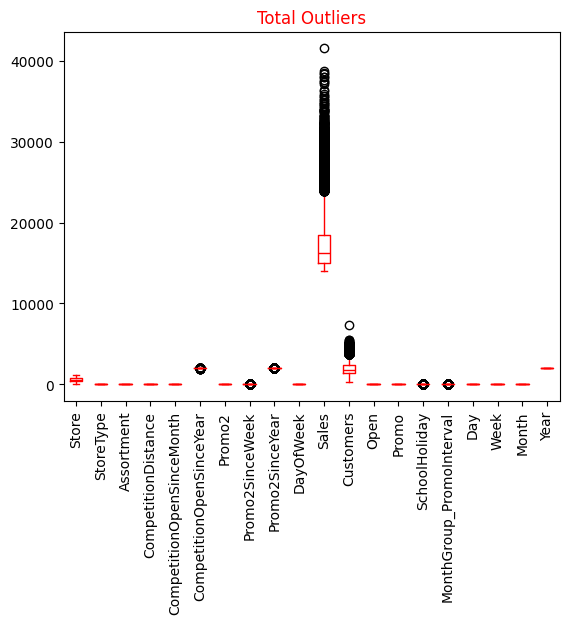

In [83]:
plt.figure(figsize = (15,3), dpi = 200)
outliers.plot(kind = 'box', color = 'red')
plt.xticks(rotation = 90)
plt.title('Total Outliers', color = 'red')
plt.show()

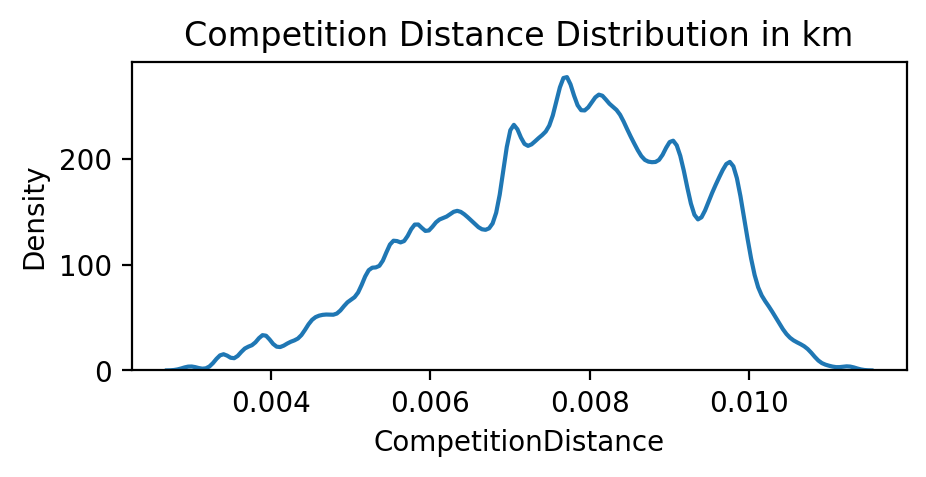

In [84]:
plt.figure(figsize=(5,2), dpi=200)
sns.kdeplot(merged_train_and_store_data['CompetitionDistance']/1000)
plt.title('Competition Distance Distribution in km')
plt.show()

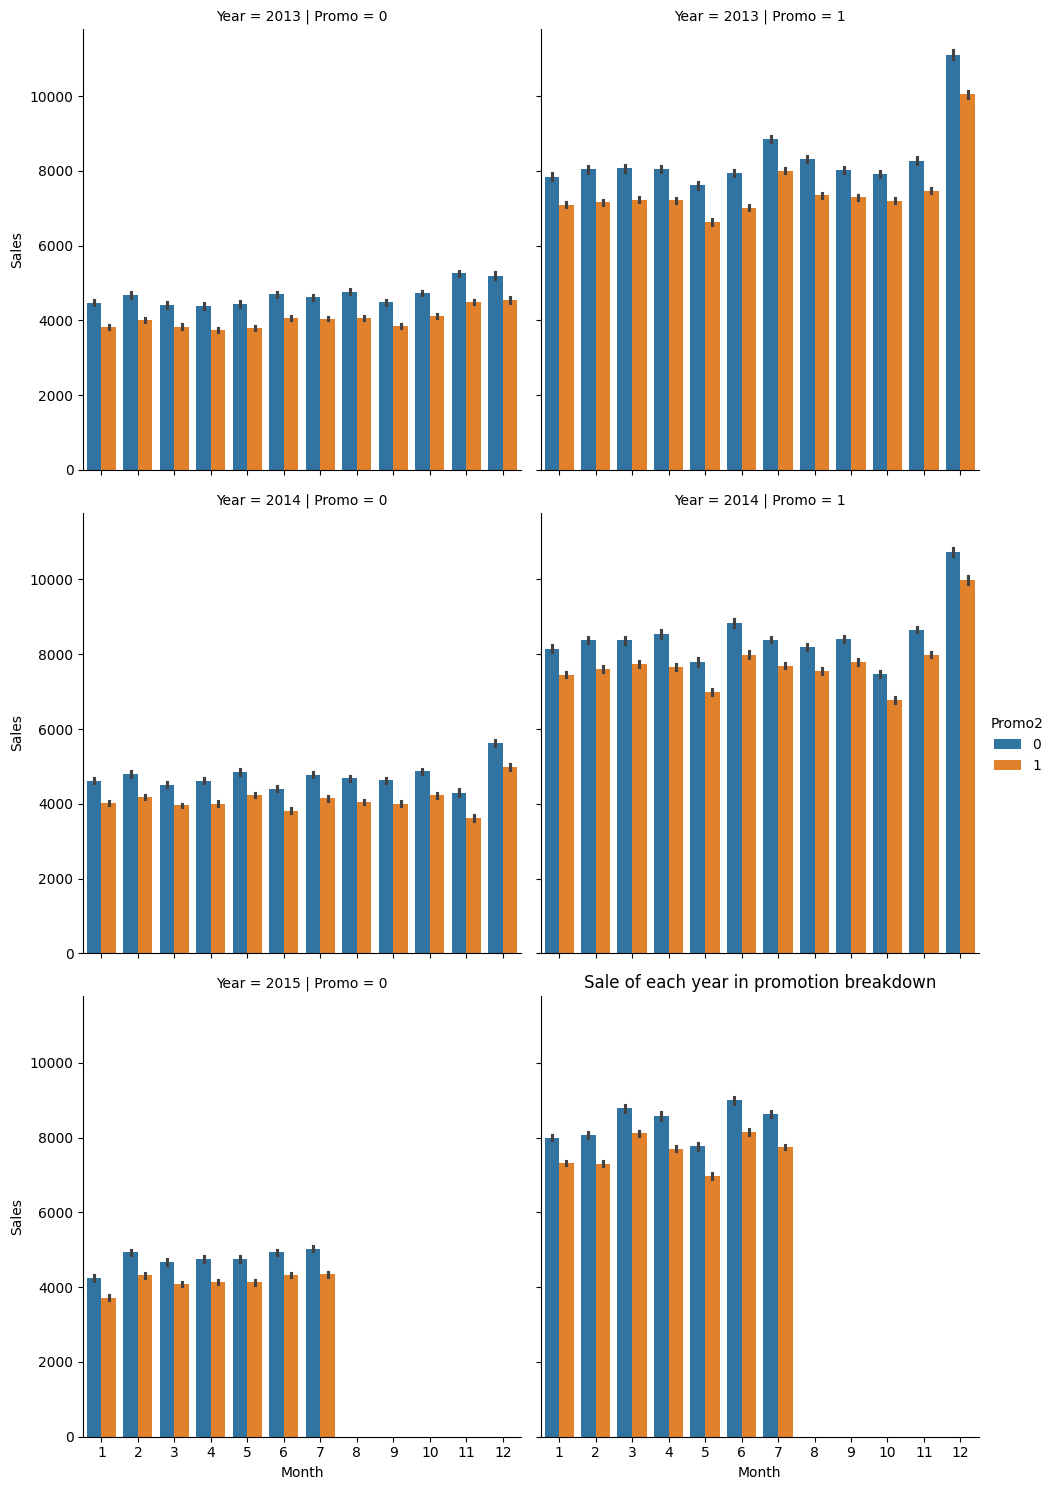

In [85]:
sns.catplot(data = merged_train_and_store_data, x='Month', y='Sales', col ='Promo', hue='Promo2', row='Year', kind="bar")
plt.title('Sale of each year in promotion breakdown')
plt.show()

[]

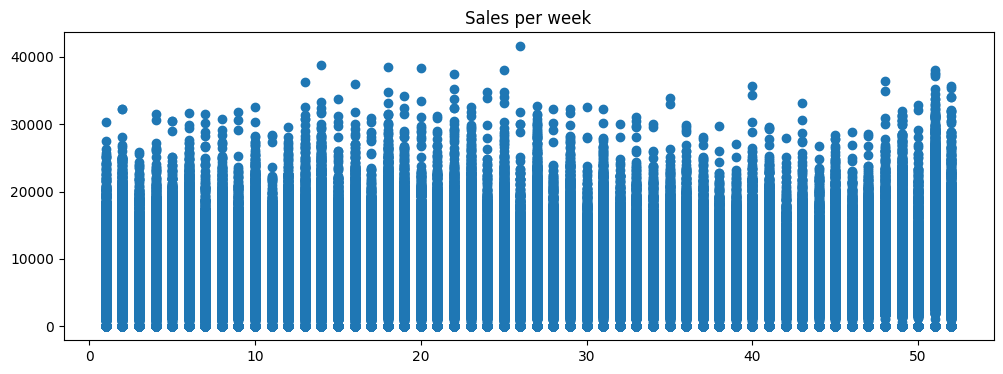

In [87]:
#Sales weekly
plt.figure(figsize=(12, 4))
plt.scatter(merged_train_and_store_data["Week"],merged_train_and_store_data["Sales"])
plt.title('Sales per week')
plt.plot()

[]

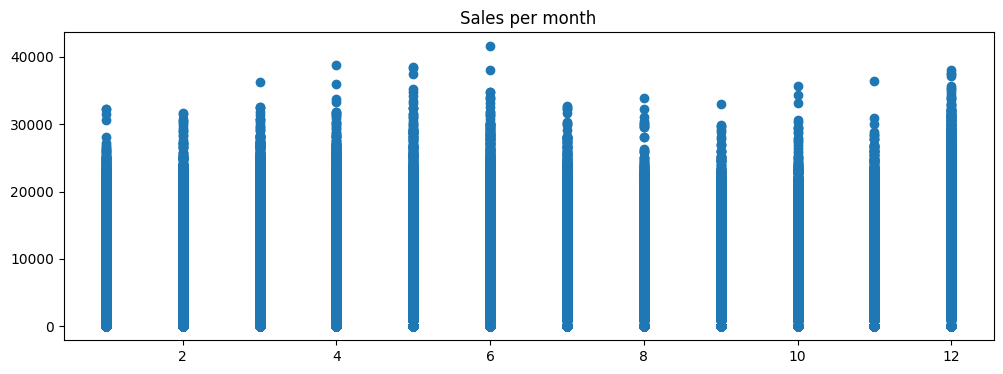

In [88]:
#Sales monthly
plt.figure(figsize=(12, 4))
plt.scatter(merged_train_and_store_data["Month"],merged_train_and_store_data["Sales"])
plt.title('Sales per month')
plt.plot()

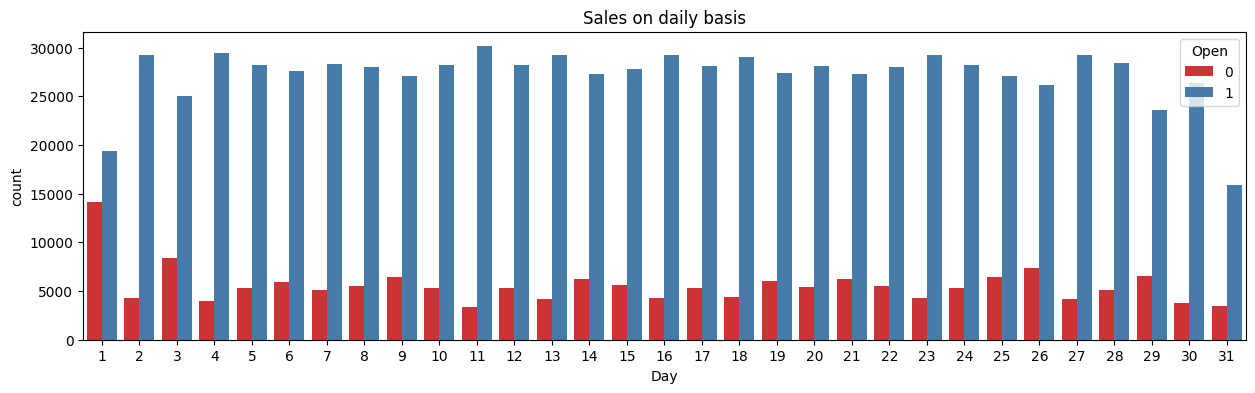

In [89]:
#Open_DayOfWeek
plt.figure(figsize=(15,4))
sns.countplot( x='Day', data=merged_train_and_store_data, hue="Open", palette="Set1")
plt.title('Sales on daily basis')
plt.show()

Almost all the stores are closed at the weekend.

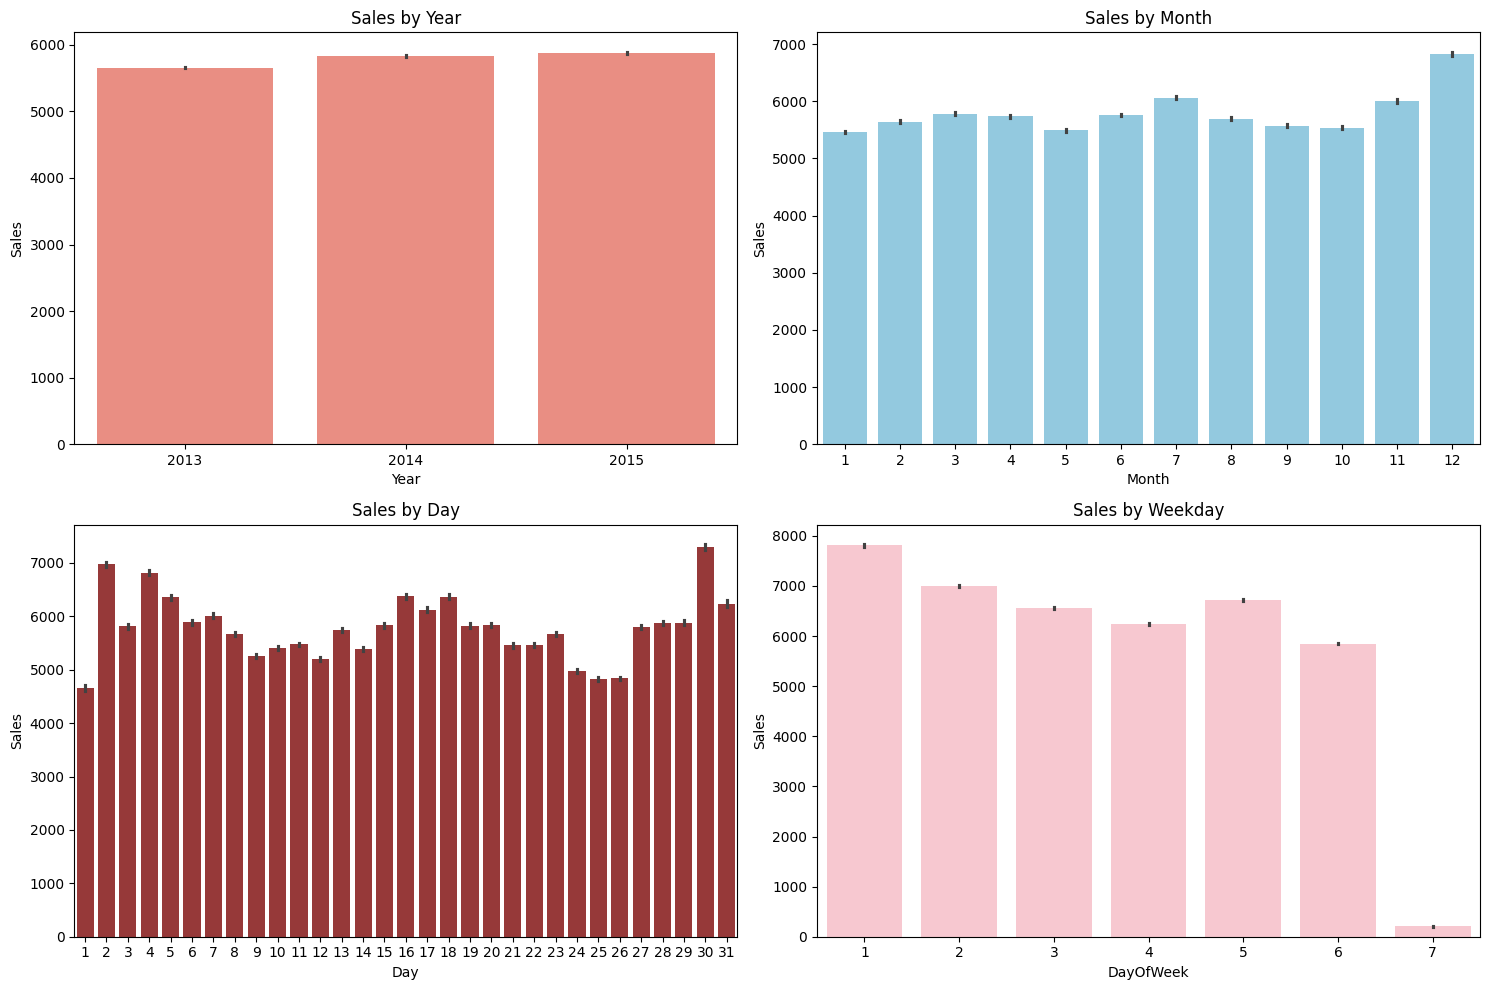

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(x='Year',y="Sales", data=merged_train_and_store_data, ax=axes[0, 0], color = 'salmon')
sns.barplot(x='Month',y="Sales", data=merged_train_and_store_data, ax=axes[0, 1], color = 'skyblue')
sns.barplot(x='Day',y="Sales", data=merged_train_and_store_data, ax=axes[1, 0], color = 'brown')
sns.barplot(x='DayOfWeek',y="Sales", data=merged_train_and_store_data, ax=axes[1, 1], color = 'pink')

# Set the titles for each chart
axes[0, 0].set_title('Sales by Year')
axes[0, 1].set_title('Sales by Month')
axes[1, 0].set_title('Sales by Day')
axes[1, 1].set_title('Sales by Weekday')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of bar charts
plt.show()